<a href="https://colab.research.google.com/github/bkksl/AI_Bootcamp_Group_Projects-/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Önişleme

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

path = '/content/drive/MyDrive/Bootcamp/AI/PetImages/'

categories = ['Cat', 'Dog']

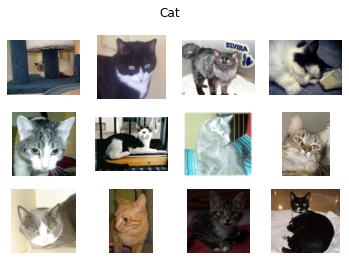

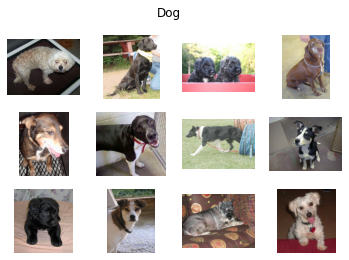

In [ ]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [ ]:
shape0 = []       #resimlerin max ve min boyutunu bulma
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        #shape0.append(plt.imread(path+category+'/'+ files).shape[1])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []

In [ ]:
data = []        #resimleri belirlenen boyuta getirmek (resizing)
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3


for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dog', k=1 : 'panda', k=2 : 'cat'

import random
random.shuffle(imagePaths)
print(imagePaths[:10],'\n')

for imagePath in imagePaths:
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT)) 
    data.append(image)
    
    label = imagePath[1]
    labels.append(label)

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

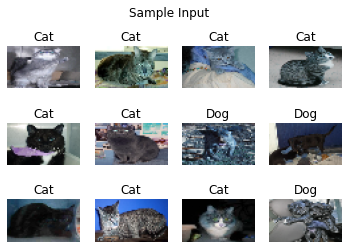

In [ ]:
fig, _ = plt.subplots(3,4)         #test çıktısı
fig.suptitle("Sample Input")
fig.patch.set_facecolor('xkcd:white')
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
y_train = np_utils.to_categorical(y_train, 3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(372, 32, 55, 3)
(94, 32, 55, 3)
(372, 3)
(94,)


In [ ]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 54, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 26, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 13, 32)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 13, 32)         0         
                                                                 
 flatten (Flatten)           (None, 2912)              0

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
12/12 [==============================] - 1s 43ms/step - loss: 0.8630 - accuracy: 0.4704
Epoch 2/50
12/12 [==============================] - 1s 45ms/step - loss: 0.7278 - accuracy: 0.5376
Epoch 3/50
12/12 [==============================] - 1s 44ms/step - loss: 0.7346 - accuracy: 0.4946
Epoch 4/50
12/12 [==============================] - 1s 43ms/step - loss: 0.7003 - accuracy: 0.5376
Epoch 5/50
12/12 [==============================] - 1s 65ms/step - loss: 0.6691 - accuracy: 0.5914
Epoch 6/50
12/12 [==============================] - 1s 75ms/step - loss: 0.6475 - accuracy: 0.6048
Epoch 7/50
12/12 [==============================] - 1s 114ms/step - loss: 0.6353 - accuracy: 0.6720
Epoch 8/50
12/12 [==============================] - 1s 44ms/step - loss: 0.6212 - accuracy: 0.6478
Epoch 9/50
12/12 [==============================] - 1s 44ms/step - loss: 0.6035 - accuracy: 0.6828
Epoch 10/50
12/12 [==============================] - 1s 43ms/step - loss: 0.5929 - accuracy: 0.6747
Epoch 11

In [ ]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(X_test)
predictions = argmax(pred, axis=1) 

cm = confusion_matrix(y_test, predictions)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(y_test, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [ ]:
model.save('model_animal_cnn_1.h5')


# 2. Model Eğitimi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pandas==1.3


In [ ]:
pip install pandas==0.22

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Models 
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

import os

folder_path = '/content/drive/MyDrive/Bootcamp/AI/PetImages'
for dirname, _, filenames in os.walk(folder_path): 
    print(dirname)

In [ ]:
print('Total cats images:', len(os.listdir(folder_path + '/CAT')))
print('Total dogs images:', len(os.listdir(folder_path + '/DOG')))

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2

# reading images
Image1 = image.load_img(folder_path + '/CAT/0.jpg')
Image2 = image.load_img(folder_path + '/DOG/0.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Second")


In [ ]:
train_datagen = ImageDataGenerator(
                fill_mode = 'nearest',
                validation_split=0.2
)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
)
validation_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.applications.resnet50.ResNet50(input_shape=(108,108,3), include_top=False)])
for layer in model.layers:
  layer.trainable = False

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=25,
                    verbose=1,
                    )

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()